In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import numpy as np
import get_stats

In [3]:
path_name_orig = '../programs_processed_precond_nograb_morepreconds/initstate/*/*.json'

In [4]:
list_str, list_str_dict, title_names = get_stats.get_stats(path_name_orig)

In [53]:
change_in_relation = {}
for i in range(len(title_names)):
    proportions_task = list_str_dict[title_names[i]]
    for rel_name, prop in proporitions_task.items():
        all_prop = list_str[rel_name]
        if rel_name not in change_in_relation:
            change_in_relation[rel_name] = []
        change_in_relation[rel_name].append(max(all_prop, prop)*1./min(all_prop, prop))

avg_change_in_relation = {}
for elem, values in change_in_relation.items():
    #print(elem, values)
    avg_change_in_relation[elem] = np.mean(values)
    

elems_sorted = sorted([x for x in avg_change_in_relation.items()], key=lambda v: -v[1])
print([x[0] for x in elems_sorted[:5]])
print([x[0] for x in elems_sorted[-5:]])

35.1063829787234 34.67336683417086
['cup.atreach.dish_soap', 'rag.atreach.dish_soap', 'mug.atreach.sink', 'plate.atreach.dish_soap', 'drinking_glass.atreach.sink']
['faucet.is_off', 'faucet.plugged', 'dishrack.atreach.sink', 'dishwasher.location.kitchen', 'drying_rack.location.kitchen']


99.99999999999999


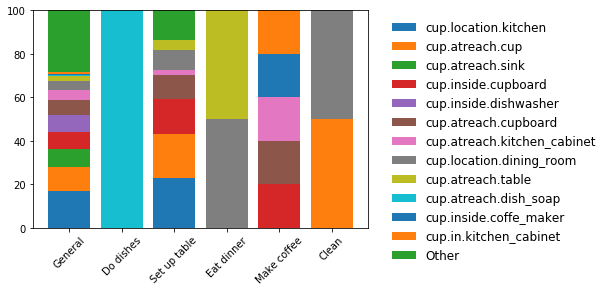

100.0


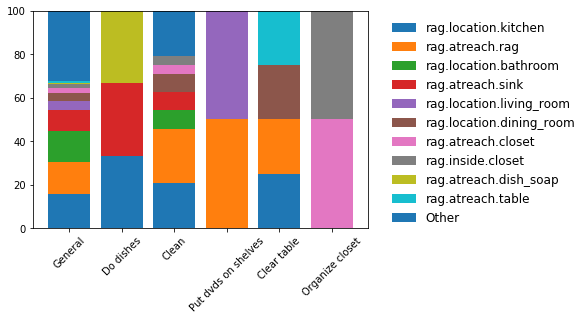

99.99999999999999


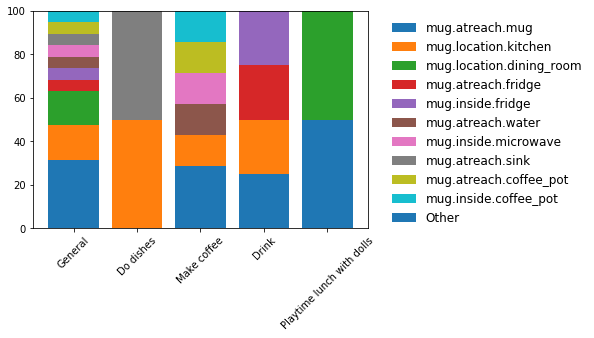

100.00000000000001


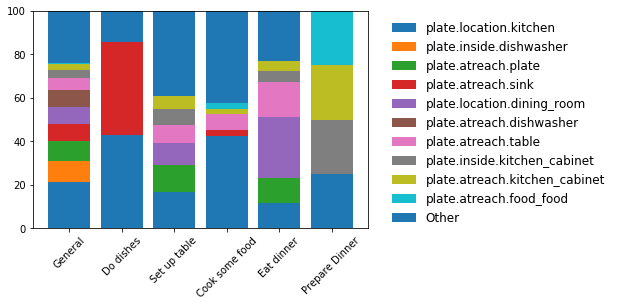

100.0


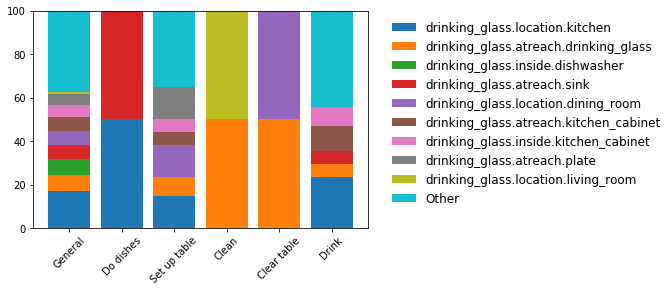

In [79]:
# top 5 objects
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt
num_activities_show = 5
for elem in elems_sorted[:5]:
    object_name = elem[0].split('.')[0]
    # Find all the relations with this object
    rel_general = [(rn, perc) for (rn, perc) in list_str.items() if rn.split('.')[0] == object_name]
    
    # Find the relations per activity
    rel_activity = [[(rn,perc) for rn, perc in list_str_dict[act_name].items() if rn.split('.')[0] == object_name ] for act_name in title_names]
    rel_activity = [(tname, rel_act) for tname, rel_act in zip(title_names, rel_activity) if len(rel_act) > 0]
    
    # We want to put as other relationships that appear less than 5% of the times and also less than 5% 
    # on the activities we will model
    map_to_other = [x[0] for x in rel_general if x[1] < 5]
    for _, rel_act in rel_activity[:num_activities_show]:
        relations_more_than = [x[0] for x in rel_act if x[1] > 15]
        map_to_other = [x for x in map_to_other if x not in relations_more_than]
    
    
    rel_general.append(('Other', np.sum([x[1] for x in rel_general if x[0] in map_to_other])))
    rel_general = [x for x in rel_general if x[0] not in map_to_other]
    
    for it, (_, rel_act) in enumerate(rel_activity[:num_activities_show]):
        rel_act.append(('Other', np.sum([x[1] for x in rel_act if x[0] in map_to_other])))
        rel_activity[it] = (rel_activity[it][0], [x for x in rel_act if x[0] not in map_to_other])
    all_relationships = [x[0] for x in rel_general]  
    Y_all_data = []
    plt.figure()
    relations = [x[1] for x in all_relationships]
    if (len(rel_activity) > num_activities_show):
        rel_activity = rel_activity[:num_activities_show]
    activities = ['General'] + [x[0] for x in rel_activity]
    for it, relation in enumerate(all_relationships):
        Y_data = []
        Y_data.append(rel_general[it][1])
        for _, it_activity in rel_activity:
            #print(it_activity, relation)
            cont = [x for x in it_activity if x[0] == relation]
            if (len(cont) > 0):
                Y_data.append(cont[0][1])
            else:
                Y_data.append(0)
        Y_all_data.append(Y_data)
    print(np.sum([l[0] for l in Y_all_data]))
    cumsumbottom = [0]*len(Y_all_data[0])
    plots = []
    for Y_data in Y_all_data:
        ind = np.arange(len(Y_data))
        plots.append(plt.bar(ind, Y_data, bottom=cumsumbottom))
        plt.xticks(ind, tuple(activities), rotation=45)
        cumsumbottom = [x+y for x,y in zip(cumsumbottom, Y_data)]
    plt.legend(tuple(plots), tuple(all_relationships), fontsize=12, framealpha=0, fancybox=True, bbox_to_anchor=(1.04,1), loc="upper left")
        
    plt.show()
    # print(rel_general)
    #print(rel_activity)

In [ ]:
for elem in elems_sorted[:5]:
    object_name = elem[0].split('.')[0]
    rel_general = [(rn, perc) for (rn, perc) in list_str.items() if rn.split('.')[0] == object_name]
    rel_activity = [[(rn,perc) for rn, perc in list_str_dict[act_name].items() if rn.split('.')[0] == object_name ] for act_name in title_names]
    rel_activity = [(tname, rel_activity) for tname, rel_activity in zip(title_names, rel_activity) if len(rel_activity) > 0]
    print(rel_general)
    print(rel_activity)

In [97]:
minim = np.argmin(distances, 1)
sortedv = np.argsort(distances,1)
values = np.min(distances, 1)

In [98]:
print(minim[287])
print(np.min(distances[287, :]))
print(distances[287, minim[287]])

343
0.007290148043997551
0.007290148043997551


In [99]:
prog_close = np.argsort(values)

In [161]:
pwd


'/data/vision/torralba/frames/data_acquisition/SyntheticStories/VirtualHome2/virtualhome/dataset_augmentation/jupyter_notebook'

In [158]:
list_str_dict['Go pee']

{'clothes_dress.atreach.toilet': 5.88235294117647,
 'clothes_dress.location.bathroom': 5.88235294117647,
 'clothes_underwear.atreach.toilet': 5.88235294117647,
 'clothes_underwear.location.bathroom': 5.88235294117647,
 'faucet.atreach.sink': 5.88235294117647,
 'faucet.in.sink': 5.88235294117647,
 'faucet.is_off': 5.88235294117647,
 'faucet.location.bathroom': 5.88235294117647,
 'faucet.plugged': 5.88235294117647,
 'hands_both.atreach.sink': 5.88235294117647,
 'hands_both.location.bathroom': 5.88235294117647,
 'sink.location.bathroom': 5.88235294117647,
 'soap.atreach.sink': 5.88235294117647,
 'soap.location.bathroom': 5.88235294117647,
 'toilet.atreach.toilet': 5.88235294117647,
 'toilet.free': 5.88235294117647,
 'toilet.location.bathroom': 5.88235294117647}

In [153]:
obji = []
names = []
for prog_id in prog_close[:1]:
    t1 = title_names[prog_id]
    l1 = list_str_dict[t1]
    l1 = [(x, l1[x]) for x in set(l1)]
    obji.append([(l1_.split('.')[0], '.'.join(l1_.split('.')[1:]), value) for l1_, value in l1])
    names.append(title_names[prog_id])
    for it in range(5):
        prog_closest = sortedv[prog_id, it]
        t2 = title_names[prog_closest]
        names.append(t2)
        l2 = list_str_dict[t2]
        obj = set([l1_[0] for l1_ in l1]).intersection(l2)
        l2 = [(x, l2[x]) for x in obj]
        obji.append([(l1_.split('.')[0], '.'.join(l1_.split('.')[1:]), value) for l1_, value in l2])

   
    

In [152]:
all_objects = []
all_relations = []
rel_dict = {}

for o in obji: 
    for obj_name in o:
        #print(obj_name)
        if not obj_name[0] in rel_dict:
            rel_dict[obj_name[0]] = {}
        relation_name = obj_name[1]
        if not relation_name in rel_dict[obj_name[0]]:
            rel_dict[obj_name[0]][relation_name] = len(rel_dict[obj_name[0]])

#print(rel_dict)
for object_name in list(rel_dict)[1:]:
    all_relations = rel_dict[object_name]
    #print(all_relations)
    for o in obji:
        #print(o[:5])
        o_filter = [(l[0], l[1], l[2]) for l in o if l[0] == object_name]
        print(o_filter)
        
        array_cur = [0]*len(all_relations)
    print('---') 

[('soap', 'atreach.sink', 5.88235294117647), ('soap', 'location.bathroom', 5.88235294117647)]
[('soap', 'location.bathroom', 5.88235294117647), ('soap', 'atreach.sink', 5.88235294117647)]
[]
[('soap', 'location.bathroom', 5.555555555555555)]
[]
[]
---
[('toilet', 'atreach.toilet_paper', 5.88235294117647), ('toilet', 'location.bathroom', 5.88235294117647), ('toilet', 'free', 5.88235294117647)]
[('toilet', 'location.bathroom', 5.88235294117647), ('toilet', 'free', 5.88235294117647)]
[]
[]
[]
[('toilet', 'atreach.toilet_paper', 6.666666666666667), ('toilet', 'location.bathroom', 6.666666666666667), ('toilet', 'free', 6.666666666666667)]
---
[('clothes_dress', 'atreach.toilet', 5.88235294117647), ('clothes_dress', 'location.bathroom', 5.88235294117647)]
[('clothes_dress', 'atreach.toilet', 5.88235294117647), ('clothes_dress', 'location.bathroom', 5.88235294117647)]
[]
[]
[]
[('clothes_dress', 'atreach.toilet', 6.666666666666667), ('clothes_dress', 'location.bathroom', 6.666666666666667)]
-

In [155]:
names

['Go to bathroom',
 'Go pee',
 'Do facial',
 'Give me bath',
 'Clean glasses',
 'Use restroom']